## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data

In [2]:
data = pd.read_csv('Data/2_Customer_Feedback_encode.csv')

In [3]:
data.head()

,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,sentiment_score,sentiment_category,sentiment_ordinal
0,CUST2824,JioMart,00:19:29.500000,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,0,0,0.600000,positive,2
1,CUST1409,Blinkit,00:54:29.500000,16,Dairy,279,Quick and reliable!,5,0,0,0.416667,positive,2
2,CUST5506,JioMart,00:21:29.500000,25,Beverages,599,Items missing from order.,2,0,1,-0.200000,neutral,1
3,CUST5012,JioMart,00:19:29.500000,42,Beverages,946,Items missing from order.,2,1,1,-0.200000,neutral,1
4,CUST4657,Blinkit,00:49:29.500000,30,Beverages,334,"Fast delivery, great service!",5,0,0,0.600000,positive,2


### Getting inferences from data through data visualisation

#### 1. Which platform get most order?

C:\Users\HETVI KHADELA\AppData\Local\Temp\ipykernel_21628\4244481640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Platform'], palette = 'pastel')


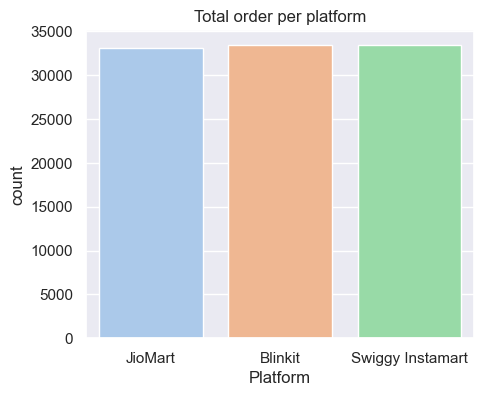

In [8]:
plt.figure(figsize = (5,4))

sns.countplot(x = data['Platform'], palette = 'pastel')
plt.title('Total order per platform')

plt.show()

#### 2. Average order value per platform

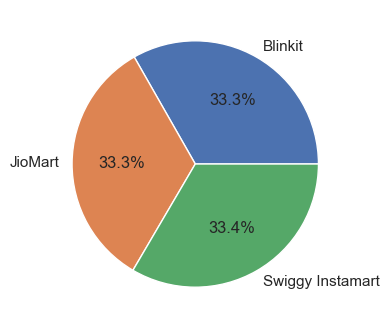

Avg. value of Blinkit 589.5489468645285
Avg. value of JioMart 590.5265191535606
Avg. value of Swiggy Instamart 592.9021495410924


In [33]:
x = data['Platform']
y = data.groupby('Platform')['Order Value (INR)'].mean().reset_index()

plt.figure(figsize = (5,4))
plt.pie(y['Order Value (INR)'], labels = ['Blinkit','JioMart', 'Swiggy Instamart'],autopct="%1.1f%%")
plt.show()
print(f"Avg. value of Blinkit {y.iloc[0,1]}")
print(f"Avg. value of JioMart {y.iloc[1,1]}")
print(f"Avg. value of Swiggy Instamart {y.iloc[2,1]}")

#### 3. Which platform take most time to deliver product?

In [34]:
x = data['Platform']
y = data.groupby('Platform')['Delivery Time (Minutes)'].mean().reset_index()

In [35]:
y

,Platform,Delivery Time (Minutes)
0,Blinkit,29.474898
1,JioMart,29.634498
2,Swiggy Instamart,29.499925


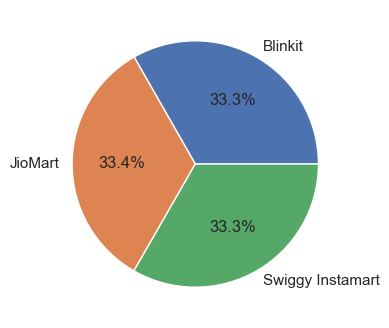

In [37]:
plt.figure(figsize = (5,4))
plt.pie(y['Delivery Time (Minutes)'], labels = ['Blinkit','JioMart', 'Swiggy Instamart'],autopct="%1.1f%%")
plt.show()

#### 4. Which platform can deliver order by time?

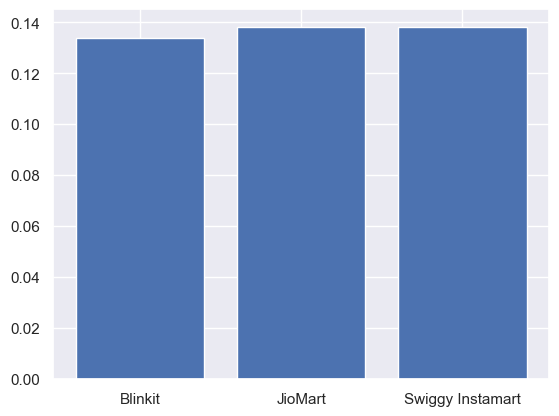

,Platform,Delivery Delay
0,Blinkit,0.133826
1,JioMart,0.138256
2,Swiggy Instamart,0.138091


In [45]:
x = data['Platform']
y = data.groupby('Platform')['Delivery Delay'].mean().reset_index()

plt.bar(y['Platform'], y['Delivery Delay'])
plt.show()
y

In [46]:
data['Delivery Delay'].mean()

np.float64(0.13672)

#### 5. Which platform get highest avg. service rating?

In [4]:
x = data['Platform']
y = data.groupby('Platform')['Service Rating'].mean().reset_index()

In [5]:
y

,Platform,Service Rating
0,Blinkit,3.233844
1,JioMart,3.245147
2,Swiggy Instamart,3.243415


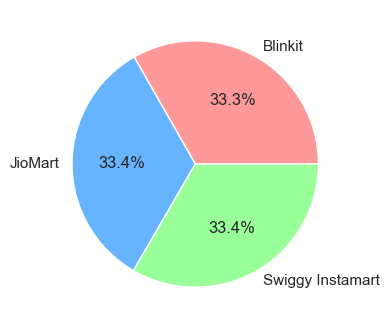

In [8]:
plt.figure(figsize = (5,4))
colors = ['#ff9999','#66b3ff','#99ff99']  # soft red, blue, green
plt.pie(y['Service Rating'], labels = ['Blinkit','JioMart', 'Swiggy Instamart'],colors = colors, autopct="%1.1f%%")
plt.show()

#### 6. Total positive feedback per platform

In [9]:
data['sentiment_category'].value_counts()

sentiment_category
positive    54181
negative    38082
neutral      7737
Name: count, dtype: int64

In [14]:
# Filter only positive feedback
positive_feedback = data[data['sentiment_category'] == 'positive']

# Group by Platform and count positive feedback
positive_counts = positive_feedback.groupby('Platform').size().reset_index(name='Total Positive Feedback')

# Display the result
positive_counts

,Platform,Total Positive Feedback
0,Blinkit,18071
1,JioMart,17949
2,Swiggy Instamart,18161


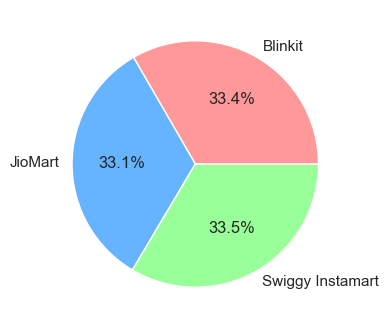

In [13]:
plt.figure(figsize = (5,4))

plt.pie(positive_counts['Total Positive Feedback'], labels = ['Blinkit','JioMart', 'Swiggy Instamart'],colors = colors, autopct="%1.1f%%")
plt.show()

#### 7. Total negative counts per platform

In [17]:
# Filter only positive feedback
negative_feedback = data[data['sentiment_category'] == 'negative']

# Group by Platform and count positive feedback
negative_counts = negative_feedback.groupby('Platform').size().reset_index(name='Total Negative Feedback')

# Display the result
negative_counts

,Platform,Total Negative Feedback
0,Blinkit,12815
1,JioMart,12567
2,Swiggy Instamart,12700


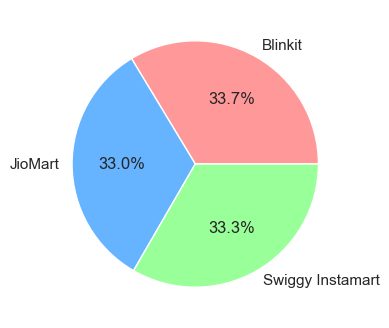

In [18]:
plt.figure(figsize = (5,4))

plt.pie(negative_counts['Total Negative Feedback'], labels = ['Blinkit','JioMart', 'Swiggy Instamart'],colors = colors, autopct="%1.1f%%")
plt.show()

#### 8. Total neutral feedback per platform

In [19]:
# Filter only positive feedback
neutral_feedback = data[data['sentiment_category'] == 'neutral']

# Group by Platform and count positive feedback
neutral_counts = neutral_feedback.groupby('Platform').size().reset_index(name='Total Neutral Feedback')

# Display the result
neutral_counts

,Platform,Total Neutral Feedback
0,Blinkit,2538
1,JioMart,2611
2,Swiggy Instamart,2588


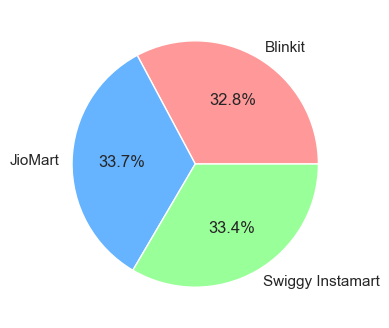

In [20]:
plt.figure(figsize = (5,4))

plt.pie(neutral_counts['Total Neutral Feedback'], labels = ['Blinkit','JioMart', 'Swiggy Instamart'],colors = colors, autopct="%1.1f%%")
plt.show()

In [21]:
data.head()

,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,sentiment_score,sentiment_category,sentiment_ordinal
0,CUST2824,JioMart,00:19:29.500000,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,0,0,0.600000,positive,2
1,CUST1409,Blinkit,00:54:29.500000,16,Dairy,279,Quick and reliable!,5,0,0,0.416667,positive,2
2,CUST5506,JioMart,00:21:29.500000,25,Beverages,599,Items missing from order.,2,0,1,-0.200000,neutral,1
3,CUST5012,JioMart,00:19:29.500000,42,Beverages,946,Items missing from order.,2,1,1,-0.200000,neutral,1
4,CUST4657,Blinkit,00:49:29.500000,30,Beverages,334,"Fast delivery, great service!",5,0,0,0.600000,positive,2


## Analysis based on category

#### 9. Which category sales most?

In [27]:
total_counts = data['Product Category'].value_counts().reset_index()
total_counts

,Product Category,count
0,Dairy,16857
1,Grocery,16737
2,Snacks,16705
3,Fruits & Vegetables,16632
4,Beverages,16536
5,Personal Care,16533


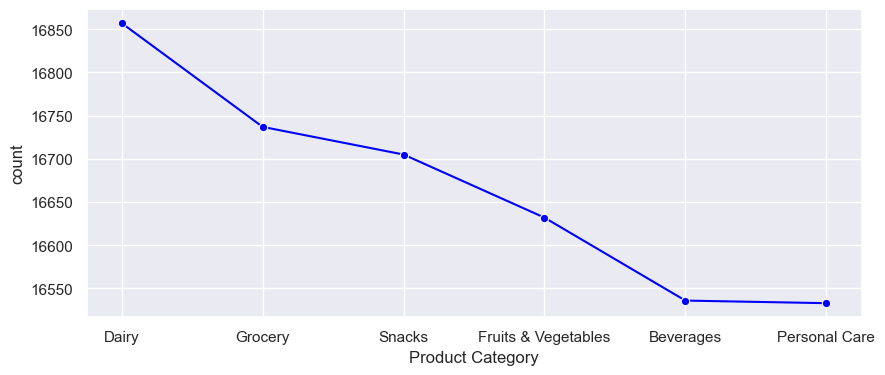

In [29]:
plt.figure(figsize = (10,4))

sns.lineplot(x = total_counts['Product Category'], y = total_counts['count'], marker = 'o', color = 'blue')
plt.show()

#### 10. which platform is on top in selling of particular product category?